<a href="https://colab.research.google.com/github/Soyeon-ErinLee/Machine_Learning/blob/master/SSS0727(iot_11_33).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/mydrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/mydrive


In [ ]:
import pandas as pd
data=pd.read_csv("/content/mydrive/Shared drives/2020 KU datathon/data/iot_11_33.txt",sep="|",header=None)
##대표 데이터 셋으로 2020.02.20 오전 9시부터 2020.02.27 오전 8시 59분 까지의 데이터를 사용.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2020-02-20 09:00:26.77297+09,11520,2020-02-20 09:00:26,0,48,19.809971,30.242950,780,0,0,202
1,2020-02-20 09:01:26.769207+09,11520,2020-02-20 09:01:26,0,48,19.842146,29.754669,754,0,0,202
2,2020-02-20 09:02:26.789456+09,11520,2020-02-20 09:02:26,0,48,19.906497,29.541046,756,0,0,202
3,2020-02-20 09:03:26.77796+09,11520,2020-02-20 09:03:26,0,48,19.960122,29.251129,735,0,0,202
4,2020-02-20 09:04:26.767587+09,11520,2020-02-20 09:04:26,0,47,20.024473,29.136688,738,0,0,202


In [ ]:
data = data.drop([0,1],axis=1)
data.columns=['time_stamp_s','fire','dust','temperature','humidity','co2','moving','door','roomid']

In [ ]:
import numpy as np

data['roomid']=data['roomid'].astype(str)
conditions = [
    (data.roomid.str.startswith('2')),
    (data.roomid.str.startswith('3')),
    (data.roomid.str.startswith('4')),
    (data.roomid.str.startswith('5'))]
choices = ['floor2', 'floor3', 'floor4','floor5']
data['floor'] = np.select(conditions, choices, default='floorB') # floor 변수 생성!

In [ ]:
# Outlier 제거 
# co2: 0<= data.co2<=3000 
# dust:  data.dust>=0 & data.dust <800
# humidity: data.humidity >= 0
# temperature: data.temperature >= 0

data = data[(data.co2 <= 3000) & (data.co2 >= 0) & (data.dust>=0) & (data.dust <800) & (data.humidity >= 0) & (data.temperature >= 0)]

In [ ]:
# 쾌적지수
# data["humid"] = 9/5*data.temperature-0.55*(1-data.humidity/100)*(9/5*data.temperature-26)+32

In [ ]:
data['time_stamp_s']=pd.to_datetime(data['time_stamp_s'],infer_datetime_format=True)
data0224 = data[data['time_stamp_s'].dt.date.astype(str)=='2020-02-24']

In [ ]:
data0224_5 = data0224[data0224["floor"] == "floor5"]

In [ ]:
data0224_5mean=data0224_5.groupby(data0224_5['roomid'])['dust','temperature','humidity','co2'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
import pandas as pd

In [ ]:
with pd.option_context("display.max_rows", 1000):
    display(data0224_5mean)

,dust,temperature,humidity,co2
roomid,,,,
501,30.454482,21.090737,27.045980,807.125782
502,33.396108,22.359101,23.284990,1331.583739
503,36.700000,23.658218,20.239569,788.435417
506,40.493398,22.160079,23.034954,792.654621
507,39.655316,21.703081,25.734238,805.283530
508,39.940931,22.751107,24.279892,785.165393
509,28.136996,22.406958,24.724012,772.878999
510,27.410292,21.450717,26.158455,763.337969
511,34.726199,24.193234,22.363885,788.444058


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


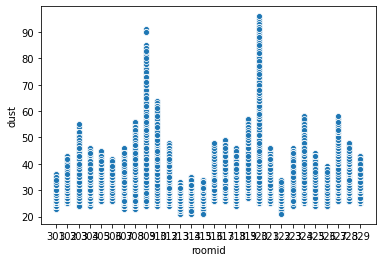

In [ ]:
import seaborn as sns
sns.scatterplot(x='roomid', y='dust',  data=data0224_2)

In [ ]:
data0224.temperature.quantile([0.25,0.5,0.75,1])

0.25    19.080664
0.50    21.214958
0.75    24.443213
1.00    36.315896
Name: temperature, dtype: float64

In [ ]:
data0224.temperature.quantile([0.25,0.5,0.75,1]).values.astype('object')

array([19.080664000000002, 21.214958, 24.443213, 36.315896], dtype=object)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


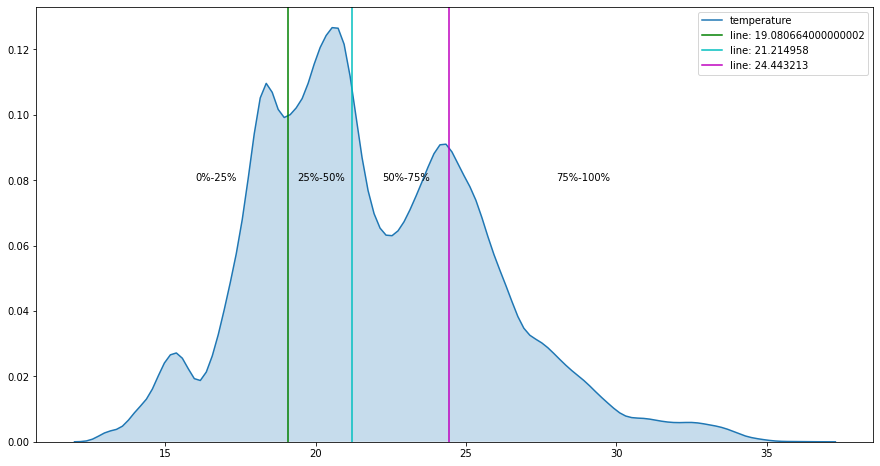

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,8))
sns.kdeplot(data0224['temperature'],shade=True)
points = data0224.temperature.quantile([0.25,0.5,0.75]).values.astype('object')
colors = ['g', 'c', 'm']
for p, c in zip(points, colors):
    plt.axvline(p, label='line: {}'.format(p), c = c)
plt.text(16, 0.08, "0%-25%")
plt.text(19.4, 0.08, "25%-50%")
plt.text(22.2, 0.08, "50%-75%")
plt.text(28, 0.08, "75%-100%")
plt.legend()
plt.show()

In [ ]:

# 오늘 날짜 입력:2020-02-25 값으로 시뮬레이션. 
data['time_stamp_s']=pd.to_datetime(data['time_stamp_s'],infer_datetime_format=True)
date_entry = input('Enter a date in YYYY-MM-DD format')
year, month, day = map(int, date_entry.split('-'))

# 해당날짜의 *전날* 데이터셋 & 4분위수:
daybefore = data[(data.time_stamp_s.dt.year==year) & (data.time_stamp_s.dt.month==month) & (data.time_stamp_s.dt.day==day-1)]
#  daybefore.temperature.quantile([0.25,0.5,0.75,1])
Q1 = daybefore.temperature.quantile([0.25]).values
Q2 = daybefore.temperature.quantile([0.5]).values
Q3 = daybefore.temperature.quantile([0.75]).values
Q4  = daybefore.temperature.quantile([1]).values

# today data!
today = data[(data.time_stamp_s.dt.year==year) & (data.time_stamp_s.dt.month==month) & (data.time_stamp_s.dt.day==day)]

#co2
co2conditions = [
              (today.co2 < 350),
              (today.co2>=350) & (today.co2<450),
              (today.co2>=450) & (today.co2<750),
              (today.co2>=750) & (today.co2<1000),
              (today.co2 >= 1000)]
co2choices= [100,80,60,40,20]


#dust
dustconditions = [
              (today.dust <= 15),
              (today.dust>=16) & (today.dust<=50),
              (today.dust>=51) & (today.dust<=75),
              (today.dust>=76) & (today.dust<=100),
              (today.dust >= 101)]
dustchoices= [100,80,60,40,20]


#humid
humidconditions = [
              (today.humidity >= 30) & (today.humidity <= 60), 
              (today.humidity < 30) , (today.humidity > 60)]
humidchoices = [100, 50, 50]



# temp1 (따뜻함선택) / 정배점 
temp1conditions = [ 
                  (today.temperature.values <= Q1),
                  (today.temperature.values >Q1) & (today.temperature.values <= Q2),
                  (today.temperature.values >Q2) & (today.temperature.values <= Q3),
                  (today.temperature.values >Q3) & (today.temperature.values <= Q4)]
temp1choices = [25,50,75,100]


# temp2 (시원함선택) / 역배점 
temp2conditions = [ 
                  (today.temperature.values <= Q1),
                  (today.temperature.values>Q1) & (today.temperature.values <= Q2),
                  (today.temperature.values >Q2) & (today.temperature.values <= Q3),
                  (today.temperature.values >Q3) & (today.temperature.values <= Q4)]
temp2choices = [100,75,50,25]

# today 데이터셋에 각 변수 score 추가:
today["co2score"] = np.select(co2conditions, co2choices)
today["dustscore"] = np.select(dustconditions, dustchoices)
today["humidscore"] = np.select(humidconditions, humidchoices)
today["temp1score"] = np.select(temp1conditions, temp1choices)
today["temp2score"] = np.select(temp2conditions, temp2choices)



Enter a date in YYYY-MM-DD format2020-02-25


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
#co2check=co2 선택(0,1) dustcheck=미세먼지선택(0,1) temp1check=상대적 따뜻함선택(0,1) temp2check=상대적 시원함선택(0,1) humidcheck=습도 선택(0,1)
example={'co2check':'NA','dustcheck':'NA','temp1check':'NA','temp2check':'NA','humidcheck':'NA'}
example=pd.DataFrame([{"co2check":0,"dustcheck":0,"temp1check":0,"temp2check":0,"humidcheck":0}])
if [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (today["co2score"] + today["dustscore"] + today["temp1score"] + today["humidscore"])/4 #00000인경우 default
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.7*today["co2score"] + 0.1*today["dustscore"] + 0.1*today["temp1score"] + 0.1*today["humidscore"])/4 #10000인 경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.7*today["dustscore"] + 0.1*today["temp1score"] + 0.1*today["humidscore"])/4 #01000인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.7*today["temp1score"] + 0.1*today["humidscore"])/4 #00100인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.7*today["temp2score"] + 0.1*today["humidscore"])/4 #00010인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.1*today["temp1score"] + 0.7*today["humidscore"])/4 #00001인경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.4*today["co2score"] + 0.4*today["dustscore"] + 0.1*today["temp1score"] + 0.1*today["humidscore"])/4 #11000인경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.4*today["co2score"] + 0.1*today["dustscore"] + 0.4*today["temp1score"] + 0.1*today["humidscore"])/4 #10100인경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.4*today["co2score"] + 0.1*today["dustscore"] + 0.4*today["temp2score"] + 0.1*today["humidscore"])/4 #10010인경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.4*today["co2score"] + 0.1*today["dustscore"] + 0.1*today["temp1score"] + 0.4*today["humidscore"])/4 #10001인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.4*today["dustscore"] + 0.4*today["temp1score"] + 0.1*today["humidscore"])/4 #01100인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.4*today["dustscore"] + 0.4*today["temp2score"] + 0.1*today["humidscore"])/4 #01010인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.4*today["dustscore"] + 0.1*today["temp1score"] + 0.4*today["humidscore"])/4 #01001인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.4*today["temp1score"] + 0.4*today["humidscore"])/4 #00101인 경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.4*today["temp2score"] + 0.4*today["humidscore"])/4 #00011인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.3*today["dustscore"] + 0.3*today["temp1score"] + 0.1*today["humidscore"])/4 #11100인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.3*today["dustscore"] + 0.3*today["temp2score"] + 0.1*today["humidscore"])/4 #11010인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.3*today["dustscore"] + 0.1*today["temp1score"] + 0.3*today["humidscore"])/4 #11001인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.1*today["dustscore"] + 0.3*today["temp1score"] + 0.3*today["humidscore"])/4 #10101인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp2check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.1*today["dustscore"] + 0.3*today["temp2score"] + 0.3*today["humidscore"])/4 #10011인 경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.3*today["dustscore"] + 0.3*today["temp1score"] + 0.3*today["humidscore"])/4 #01101인 경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 1)]: 
  today["totalscore"] = (0.1*today["co2score"] + 0.3*today["dustscore"] + 0.3*today["temp2score"] + 0.3*today["humidscore"])/4 #01011인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp2check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (today["co2score"] + today["dustscore"] + today["temp1score"] + today["humidscore"])/4 #11101인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp2check'] == 1) & (example['temp2check'] == 1) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (today["co2score"] + today["dustscore"] + today["temp2score"] + today["humidscore"])/4 #11011인 경우

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
today

,time_stamp_s,fire,dust,temperature,humidity,co2,moving,door,roomid,floor,co2score,dustscore,humidscore,temp1score,temp2score,totalscore,SSS
6652,2020-02-25 00:00:29,0,38,21.193508,29.266388,887,0,0,202,floor2,40,80,50,50,75,55.0,3
6653,2020-02-25 00:01:29,0,37,21.193508,29.266388,883,0,0,202,floor2,40,80,50,50,75,55.0,3
6654,2020-02-25 00:02:29,0,38,21.182783,29.274017,881,0,0,202,floor2,40,80,50,50,75,55.0,3
6655,2020-02-25 00:03:29,0,39,21.182783,29.258759,877,0,0,202,floor2,40,80,50,50,75,55.0,3
6656,2020-02-25 00:04:29,0,36,21.172058,29.258759,877,0,0,202,floor2,40,80,50,50,75,55.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022543,2020-02-25 23:55:29,0,21,19.563293,35.690338,883,0,0,B141,floorB,40,80,100,50,75,67.5,4
2022544,2020-02-25 23:56:29,0,20,19.563293,35.667450,869,0,0,B141,floorB,40,80,100,50,75,67.5,4
2022545,2020-02-25 23:57:29,0,21,19.552568,35.636932,874,0,0,B141,floorB,40,80,100,50,75,67.5,4
2022546,2020-02-25 23:58:29,0,21,19.541843,35.659821,882,0,0,B141,floorB,40,80,100,50,75,67.5,4


In [ ]:
today.totalscore.describe()

count    281768.000000
mean         65.175832
std           6.785125
min          37.500000
25%          61.250000
50%          66.250000
75%          67.500000
max          85.000000
Name: totalscore, dtype: float64

In [ ]:
# total score 범위에 따라 SSS지수 분류

In [ ]:
import numpy as np

SSSconditions = [
                 (today.totalscore > 80) & (today.totalscore <= 100),
                 (today.totalscore > 60) & (today.totalscore <= 80),
                 (today.totalscore > 40) & (today.totalscore <= 60),
                 (today.totalscore > 20) & (today.totalscore <= 40),
                 (today.totalscore <= 20)
]
SSSchoices= [5,4,3,2,1]
today["SSS"]= np.select(SSSconditions, SSSchoices)
today 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,time_stamp_s,fire,dust,temperature,humidity,co2,moving,door,roomid,floor,co2score,dustscore,humidscore,temp1score,temp2score,totalscore,SSS
6652,2020-02-25 00:00:29,0,38,21.193508,29.266388,887,0,0,202,floor2,40,80,50,50,75,55.0,3
6653,2020-02-25 00:01:29,0,37,21.193508,29.266388,883,0,0,202,floor2,40,80,50,50,75,55.0,3
6654,2020-02-25 00:02:29,0,38,21.182783,29.274017,881,0,0,202,floor2,40,80,50,50,75,55.0,3
6655,2020-02-25 00:03:29,0,39,21.182783,29.258759,877,0,0,202,floor2,40,80,50,50,75,55.0,3
6656,2020-02-25 00:04:29,0,36,21.172058,29.258759,877,0,0,202,floor2,40,80,50,50,75,55.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022543,2020-02-25 23:55:29,0,21,19.563293,35.690338,883,0,0,B141,floorB,40,80,100,50,75,67.5,4
2022544,2020-02-25 23:56:29,0,20,19.563293,35.667450,869,0,0,B141,floorB,40,80,100,50,75,67.5,4
2022545,2020-02-25 23:57:29,0,21,19.552568,35.636932,874,0,0,B141,floorB,40,80,100,50,75,67.5,4
2022546,2020-02-25 23:58:29,0,21,19.541843,35.659821,882,0,0,B141,floorB,40,80,100,50,75,67.5,4


In [ ]:
today.SSS.describe()

count    281768.000000
mean          3.848120
std           0.364489
min           2.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: SSS, dtype: float64

In [ ]:
from google.colab import files
today.to_csv('0225SSSdata.csv') 
files.download('0225SSSdata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>